In [2]:
import MeCab
import re
import pandas as pd
import numpy as np

mecab = MeCab.Tagger()

In [11]:
def preprocessing(document): #특수문자 기본 전처리 함수(토큰화할때 마침표제거, 숫자변환)
    docu = []
    for doc in document:
        doc = re.sub('[^가-힣0-9\s.]','',doc)
        doc = re.sub('[-=+,.#/\?:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',doc)
        doc = re.sub('[0-9]+','num',doc) #숫자를 special token num으로 치환
        pattern = re.compile(r'\s+') #중복띄어쓰기 제거
        doc = re.sub(pattern,' ',doc)
        doc = doc.replace('\xa0','') 
        doc = doc.replace('\n','')
        docu.append(doc)

    return docu

In [12]:
df = pd.read_csv('./data/crawling/preprocessed/LV1_kospi200_all.csv')
df_tokenized = pd.read_csv('./data/preprocessing/preprocessed/df_tokenized.csv', index_col=0)
df.str = preprocessing(df.str)

한국어 형태소 분석기인 mecab을 가지고 Tokenization을 해주었습니다. 명사만 따로 추출하여 wordcloud로 확인하기 위해서 명사를 따로 추출했고 토큰화가 완료된 문서들을 str_token의 형태로 추가했습니다.

In [26]:
set(mecab_types(df.str[0]))

{'EC',
 'EF',
 'EP',
 'ETM',
 'ETN',
 'IC',
 'JC',
 'JKB',
 'JKG',
 'JKO',
 'JKQ',
 'JKS',
 'JX',
 'MAG',
 'MAJ',
 'MM',
 'NNB',
 'NNBC',
 'NNG',
 'NNP',
 'NP',
 'NR',
 'SL',
 'VA',
 'VCP',
 'VV',
 'VX',
 'XPN',
 'XR',
 'XSA',
 'XSN',
 'XSV'}

In [16]:
def mecab_types(text):   # konlpy의 mecab output 형태와 같게 만들어주는 함수
    morphs = []
    
    pattern = re.compile(".*\t[A-Z]+") 
    
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    for token in temp:
        morphs.append(token[1])
    
    return morphs

In [37]:
def mecab_morphs(text):   # konlpy의 mecab output 형태와 같게 만들어주는 함수 ##조사제외
    morphs = []
    
    pattern = re.compile(".*\t[A-Z]+") 
    
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    for token in temp:
        if token
        morphs.append(token[0])
    
    return morphs

In [4]:
def mecab_nouns(text):#명사만 반환
    morphs = []
    pattern = re.compile(".*\t[A-Z]+")
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
    for token in temp:
        if token[1] == 'NNG':
            morphs.append(token[0])
    return morphs

In [5]:
df = pd.read_csv('./data/crawling/preprocessed/LV1_kospi200_all.csv',index_col = 0)

In [8]:
df

,crp_nm,crp_cd,연도,rpt_nm,rcp_no,rcp_dt,rmk,str
0,삼양홀딩스,70,2018,사업보고서 (2018.12),20190401004413,20190401,정연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 본 경영진단의견서...
1,삼양홀딩스,70,2017,사업보고서 (2017.12),20180402004217,20180402,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 본 경영진단의견서...
2,삼양홀딩스,70,2016,사업보고서 (2016.12),20170331003683,20170331,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 당사가 본 경영진단의견...
3,삼양홀딩스,70,2015,사업보고서 (2015.12),20160330002684,20160330,정연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 당사가 본 경영진단의견...
4,삼양홀딩스,70,2014,사업보고서 (2014.12),20150331002399,20150331,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항 당사가 본 경영진단의견...
...,...,...,...,...,...,...,...,...
1112,KB금융,105560,2013,사업보고서 (2013.12),20140331002917,20140331,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에서...
1113,KB금융,105560,2012,사업보고서 (2012.12),20130329001808,20130329,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에서...
1114,KB금융,105560,2011,사업보고서 (2011.12),20120330002209,20120330,정연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에서...
1115,KB금융,105560,2010,사업보고서 (2010.12),20110331002162,20110331,연,. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에서...


In [18]:
kk = [mecab_morphs(x) for x in preprocessing(df['str'])]
kl = [] #리스트안에 형태소분석된 토큰들이 들어있는 형태라서 str로 바꿔서 새 컬럼에 추가해준다
for k in kk:
    kl.append(' '.join(k))
df['str_tokens'] = kl
df = df.loc[:,('crp_nm','rpt_nm','rcp_no','rcp_dt','rmk','str','str_tokens')]

nouns_ls = [mecab_nouns(x) for x in df['str']] #noun wordcloud용
ke=[]
for k in nouns_ls:
    ke.append(' '.join(k))
df['str_nouns'] = ke

In [20]:
rcp_ls = df['rcp_no']  #연도 column 생성
rcp_ls = list(map(str,rcp_ls))
rcp__ls = []
for i in rcp_ls:
    rcp__ls.append(int(i[0:4]))
df.insert(0,'연도',rcp__ls) 

ls = []
for i in df.연도:
    ls.append(str(i))
title_ls = ls+df.crp_nm

df_cosine =  df.copy()
df_cosine.insert(0,'title',title_ls)  #새로운 title column 생성

# TF-IDF
행에는 사업보고서의 토큰화된 텍스트, 열에는 연도별 사업보고서가 나열되고 개별 문자에서 발생한 용어의 발생 빈도를 원소로 하는 행렬을 DTM(Document-Term-frequency Matrix)라고 부릅니다.

하지만 DTM의 용어들의 빈도만을 가지고 문자들의 차별성과 용어들의 중요도를 반영하기 어려워 대중적으로 많이 사용하는 가중치인 TF-IDF를 적용합니다.
사이킷런의 Tfidfvectorizer 함수를 통하여 벡터화를 시키고 linear kernel 함수를 통해 코사인 유사도를 구해주었습니다

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_cosine['str_tokens'])
# 형태소 분석마친 토큰들에 대해서 tf-idf 수행
print(tfidf_matrix.shape) #토큰화를 했을 떄와 안했을때(str) 비교했을 때 단어 수가 약 3배 적어졌다

(2486, 17228)


In [23]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df_cosine.index, index=df_cosine['title']).drop_duplicates() #title에 대하여 index생성

문서별 TF_IDF를 토대로 코사인 유사도를 계산하여 특정 문서와 높거나 낮은 유사도를 가지는 문서리스트를 반환하는 함수를 생성해 살펴보았습니다.

In [24]:
def get_similar_documents(title, cosine_sim =  cosine_sim):
    #선택한 문서의 title로 해당되는 index를 가져온다.
    idx = indices[title] 
    
    #모든 문서에 대해서 해당 문서와의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #유사도에 따라 문서 정렬
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #가장 유사한 10개 문서 가져온다.
    sim_scores = sim_scores[1:11]
    
    #가장 유사한 10개 문서의 인덱스 가져온다
    doc_indices = [i[0] for i in sim_scores]
    
    #가장 유사한 10개 문서의 title을 리턴
    for i in sim_scores:
        print(df_cosine['title'].iloc[i[0]]+ '  ('+ "%0.2f" %(i[1])+ ')') 

In [25]:
def get_different_documents(title, cosine_sim =  cosine_sim):
    #선택한 문서의 title로 해당되는 index를 가져온다.
    idx = indices[title] 
    
    #모든 문서에 대해서 해당 문서와의 유사도를 구한다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    #유사도에 따라 문서 정렬
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    #가장 덜 유사한 10개 문서 가져온다.
    sim_scores = sim_scores[-10:]
    
    #가장 덜 유사한 10개 문서의 인덱스 가져온다
    doc_indices = [i[0] for i in sim_scores]
    
    #가장 덜 유사한 10개 문서의 title을 리턴
    for i in sim_scores:
        print(df_cosine['title'].iloc[i[0]]+ '  ('+ "%0.2f" %(i[1])+ ')') 

In [26]:
get_similar_documents('2018삼성전자')

2019삼성전자  (0.93)
2017삼성전자  (0.93)
2016삼성전자  (0.91)
2015삼성전자  (0.89)
2014삼성전자  (0.86)
2013삼성전자  (0.84)
2012삼성전자  (0.84)
2011삼성전자  (0.79)
2016CJ  (0.78)
2018CJ  (0.78)


In [27]:
get_similar_documents('2015코오롱인더')

2016코오롱인더  (0.99)
2017코오롱인더  (0.98)
2014코오롱인더  (0.93)
2013코오롱인더  (0.91)
2012코오롱인더  (0.66)
2011코오롱인더  (0.57)
2012롯데칠성음료  (0.50)
2018코오롱  (0.47)
2012코오롱  (0.47)
2013코오롱  (0.47)


In [28]:
get_different_documents('2018삼성전자')

2013녹십자  (0.22)
2019일동홀딩스  (0.21)
2013일동홀딩스  (0.21)
2017한솔홀딩스  (0.18)
2015아진카인텍  (0.16)
2019신성이엔지  (0.13)
2018롯데푸드  (0.06)
2017롯데푸드  (0.06)
2016롯데푸드  (0.06)
2017한국콜마  (0.02)


In [33]:
get_similar_documents('2019삼성바이오로직스')

2018삼성바이오로직스  (0.95)
2017삼성바이오로직스  (0.89)
2019삼성물산  (0.66)
2016삼성물산  (0.62)
2018파미셀  (0.62)
2016CJ  (0.61)
2012CJ  (0.61)
2014CJ  (0.61)
2015CJ  (0.61)
2018삼성물산  (0.61)


### TF-IDF의 단어 빈도 비교

In [34]:
tfidfv = TfidfVectorizer().fit(df_cosine['str_tokens'])
print(tfidfv.transform(df_cosine['str_tokens']).toarray())
# print(tfidfv.vocabulary_)

[[0.29401491 0.         0.         ... 0.         0.         0.        ]
 [0.33397875 0.         0.         ... 0.         0.         0.        ]
 [0.39506839 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.37911618 0.         0.         ... 0.         0.         0.        ]
 [0.37388569 0.         0.         ... 0.         0.         0.        ]
 [0.44900859 0.         0.         ... 0.         0.         0.        ]]


In [35]:
tfd = pd.DataFrame(tfidfv.vocabulary_.items(), columns=['단어' , '빈도'])
tfd.sort_values('빈도',ascending=False).head()

,단어,빈도
3398,힘찬,17227
9682,힘차,17226
16647,힘있,17225
718,힘입,17224
2827,힘쓸,17223


# tfidfv_noun = TfidfVectorizer().fit(df['str_nouns'])
tfd_nouns = pd.DataFrame(tfidfv_noun.vocabulary_.items(),columns = ['단어','빈도'])
tfd_nouns.sort_values('빈도',ascending=False).head()

## Wordcloud

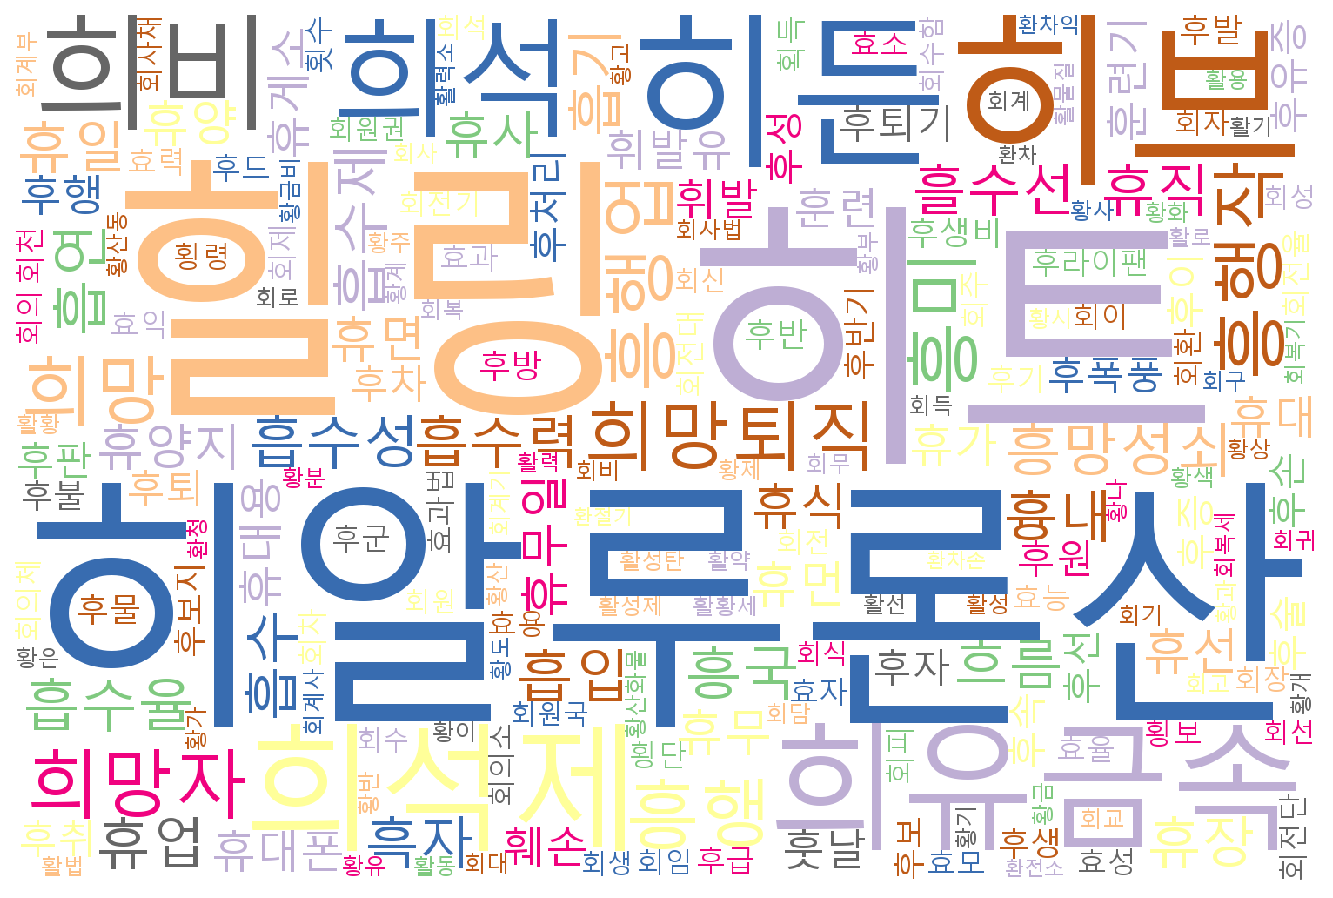

In [38]:
from wordcloud import WordCloud #wordcloud 생성
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)
plt.rcParams["figure.figsize"] = (15,8)
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(tfidfv_noun.vocabulary_) #여기에 dic형태넣어주기

plt.imshow(wordcloud)
plt.axis('off')
plt.show;